<a href="https://colab.research.google.com/github/nrrarnn/real-estate-ml/blob/main/house_price_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install kaggle

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d prokshitha/home-value-insights

Dataset URL: https://www.kaggle.com/datasets/prokshitha/home-value-insights
License(s): other
  0% 0.00/26.4k [00:00<?, ?B/s]
100% 26.4k/26.4k [00:00<00:00, 91.3MB/s]


In [10]:
!unzip home-value-insights.zip

Archive:  home-value-insights.zip
  inflating: house_price_regression_dataset.csv  


In [11]:
import pandas as pd
df = pd.read_csv("house_price_regression_dataset.csv")
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [12]:
df.shape

(1000, 8)

In [13]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [18]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


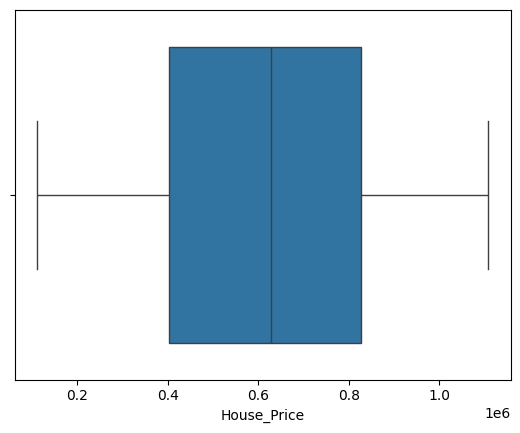

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["House_Price"])
plt.show()

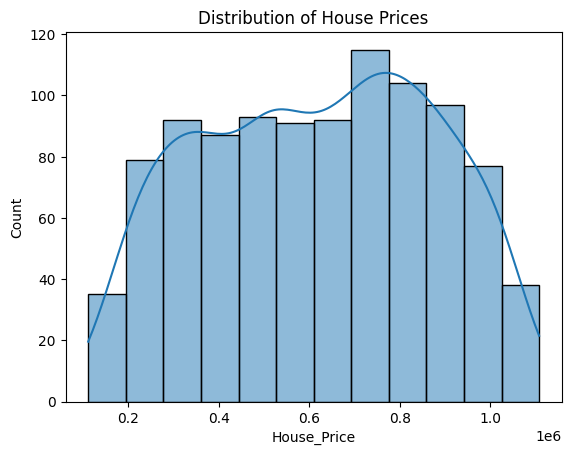

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["House_Price"], kde=True)
plt.title("Distribution of House Prices")
plt.show()

In [22]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage


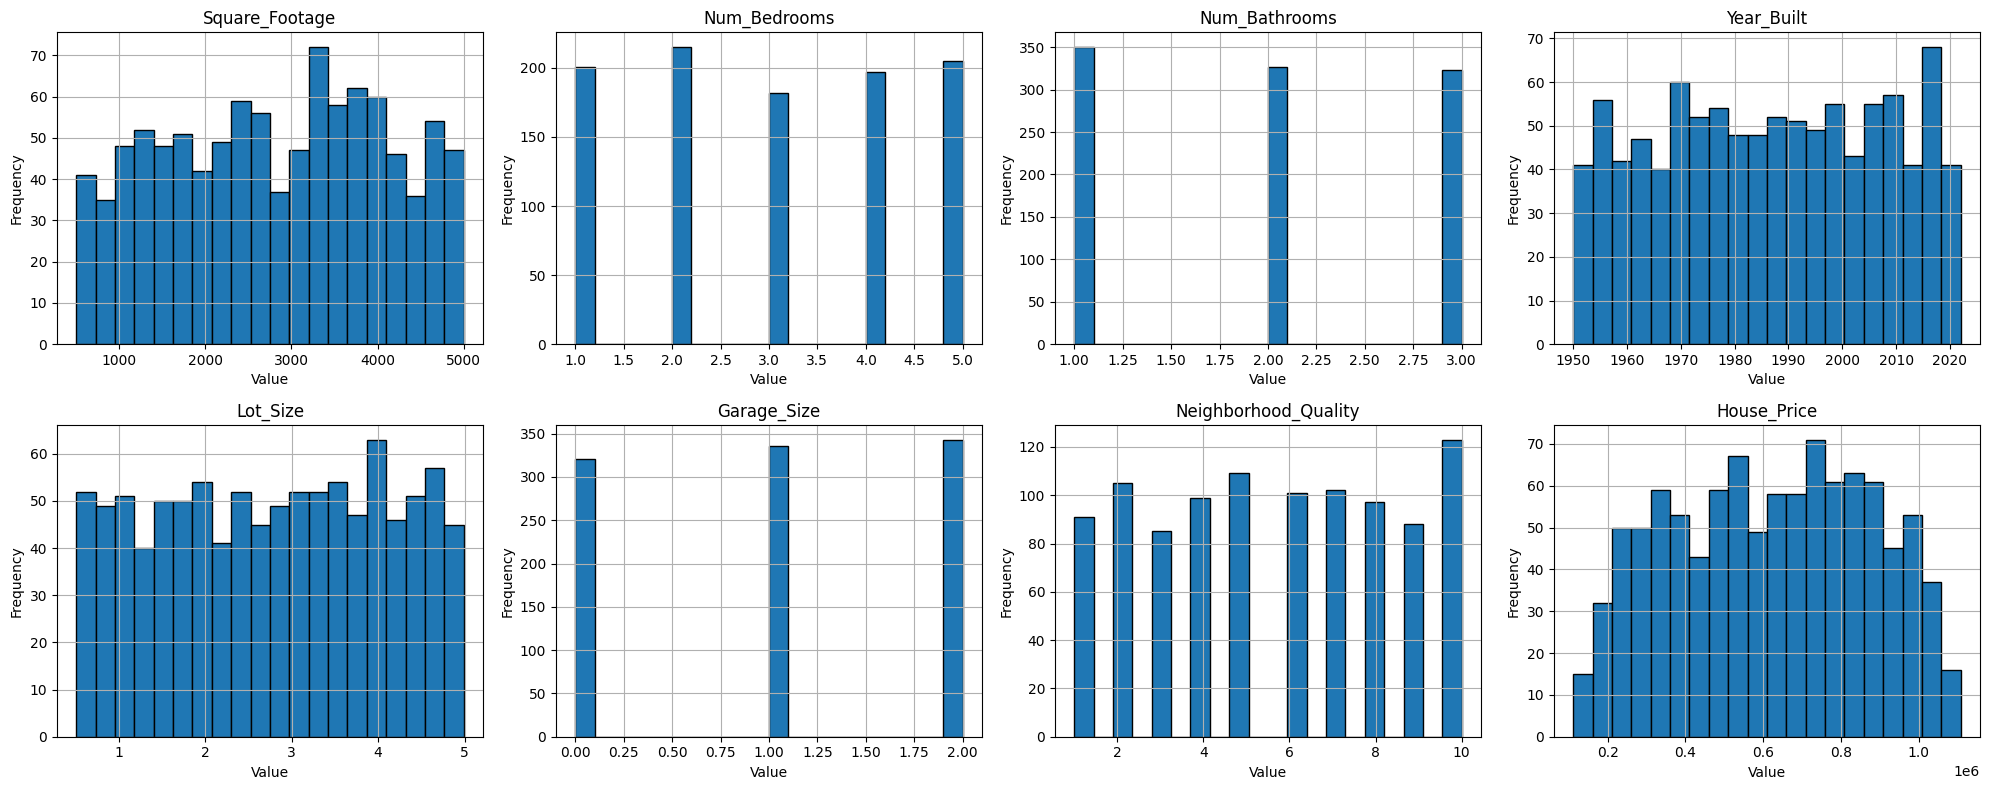

In [23]:
num_vars = df.shape[1]

n_cols = 4
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



<Axes: xlabel='House_Price', ylabel='Density'>

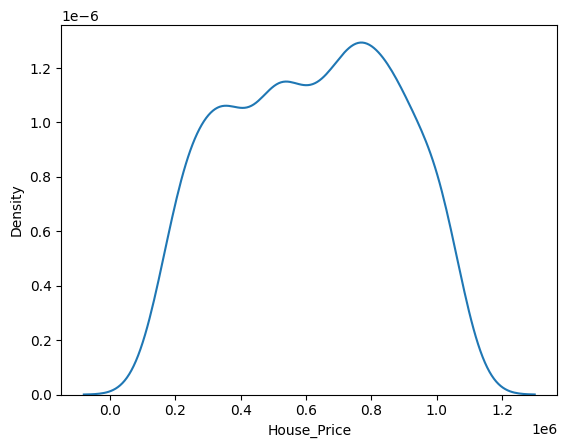

In [24]:
import seaborn as sns
sns.kdeplot(df["House_Price"])

In [25]:
df["House_Price"].skew()

np.float64(-0.06395513907654668)

In [26]:
import sklearn

X = df.drop(columns=['House_Price'])
y = df['House_Price']

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
print("Jumlah data: ",len(X))
print("Jumlah data latih: ",len(x_train))
print("Jumlah data test: ",len(x_test))
print("Jumlah target latih: ", len(y_train))
print("Jumlah target test: ", len(y_test))

Jumlah data:  1000
Jumlah data latih:  800
Jumlah data test:  200
Jumlah target latih:  800
Jumlah target test:  200


In [31]:
#model 1 (Least Angle Regression)
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

#model 2 (Linear Regression)
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

#model 3 (Gradient Boosting Regressor)
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(random_state=184)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,27090.46609,1.071792e+09,0.982163


In [33]:
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,27090.466090,1.071792e+09,0.982163
Linear Regression,7680.760842,9.537447e+07,0.998413


In [34]:
pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,27090.466090,1.071792e+09,0.982163
Linear Regression,7680.760842,9.537447e+07,0.998413
GradientBoostingRegressor,12628.832447,2.566099e+08,0.995729
